In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("icecreamdata.csv")
df.head()

Temperature     Revenue
0    24.566884  534.799028
1    26.005191  625.190122
2    27.790554  660.632289
3    20.595335  487.706960
4    11.503498  316.240194

## Visualize the data

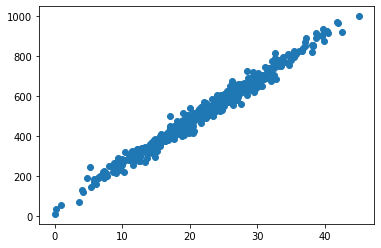

In [3]:
plt.scatter(df.Temperature, df.Revenue);

In [10]:
# Since we don't have any missing values,
# no data cleaning is required.
X = df.loc[:, ["Temperature"]].values
y = df.loc[:, "Revenue"].values

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [12]:
# create and train the decision tree regressor
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [15]:
# use the test dataset
y_pred = regressor.predict(X_test)

In [14]:
# R^2 score on the test data
regressor.score(X_test, y_test)

0.9633985989060464

In [36]:
pd.DataFrame({"Actual": y_test, "Predicted": y_pred}).sort_values("Actual", ascending=False)

Actual   Predicted
15  965.493040  969.291630
44  918.391232  926.067153
16  898.805423  905.477604
0   704.281439  690.789296
48  679.712058  691.958006
8   675.828916  655.660388
39  675.807151  711.174065
2   662.558990  641.025389
30  654.894955  651.504304
17  648.453609  691.958006
12  644.488633  654.197406
23  643.788331  726.233771
4   636.298374  641.025389
1   632.901914  639.538012
45  625.190122  570.577875
38  594.110352  538.312890
6   587.221246  571.434257
18  586.138767  501.345330
7   581.074005  643.648601
42  572.672047  594.311675
21  572.537048  621.969209
34  559.135869  603.232942
35  552.819351  543.599593
37  537.664801  545.903929
46  506.493748  536.208182
10  506.432135  501.345330
41  500.925064  499.458343
9   493.710333  458.860905
27  478.598509  505.743867
28  474.749392  437.251993
43  472.549343  467.631063
33  471.701557  496.011295
5   469.909033  427.211360
40  463.480508  437.828710
29  463.065614  459.735350
3   449.813300  475.213354
11  427.138369  443.113603
25  412.082357  441.508733
19  405.661446  402.793174
24  396.935648  402.455320
20  395.273750  383.956240
14  366.247714  367.052376
26  353.325633  356.098007
13  350.629036  362.515215
36  335.156856  319.402903
49  322.592741  334.433720
32  319.349462  306.090719
31  306.749930  280.518467
22  288.158145  278.731962
47  223.435016  216.183462

## Visualize Actual and Predicted data

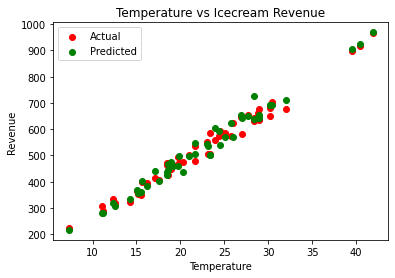

In [20]:
plt.scatter(X_test.ravel(), y_test, c="r", label="Actual")
plt.scatter(X_test.ravel(), y_pred, c="g", label="Predicted")
plt.title("Temperature vs Icecream Revenue")
plt.xlabel("Temperature")
plt.ylabel("Revenue")
plt.legend()
plt.show()

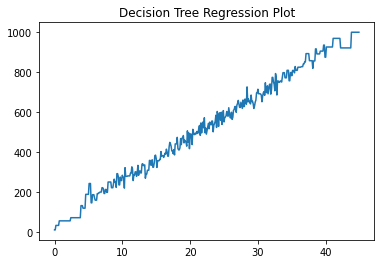

In [32]:
# plottin the decision tree
x_plot = np.arange(X.min(), X.max(), 0.1)
y_plot = regressor.predict(x_plot.reshape(-1, 1))

plt.plot(x_plot, y_plot)
plt.title("Decision Tree Regression Plot")
plt.show()